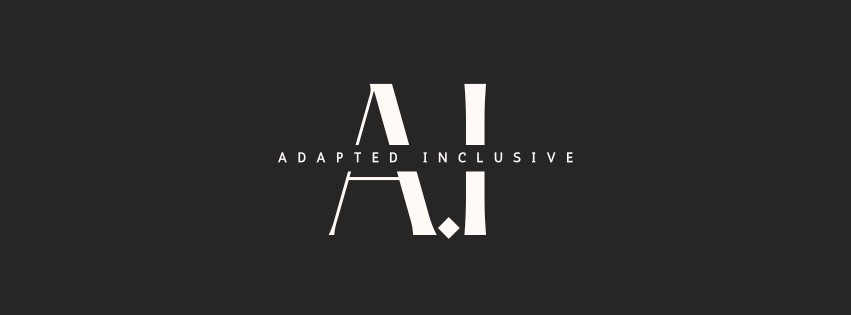

# Cybersecurity Network Traffic Data Analysis with Pandas
#### This project uses Pandas to analyse a company's network traffic. 

### Analysis involves:
##### 1. Dataset Loading:
- Loading the Network Traffic CSV Dataset from a GitHub Repository. 
##### 2. Basic Data Exploration: 
- Analysing Network Activity.
##### 3. Filter Data: 
- Selecting and Storing Blocked Traffic.
- Filtering Suspicious Traffic.
- Filtering Traffic with High Data Transfer.
##### 4. Feature Investigation:
- Splitting the Dataset into Feature and Target variables.

--------------------------------------------------------------
Created by Lucretia Dreyer 
Adapted Inclusive Group
Data Analysis with Pandas Series

In [20]:
# Install Pandas if not installed already (!pip install pandas)

In [21]:
# Import Pandas
import pandas as pd

## Load Dataset

In [22]:
# Load the CSV dataset from GitHub
url = "https://raw.githubusercontent.com/ritaafrica/data/refs/heads/main/network_traffic_data.csv" # creates a variable for the GitHub url
df = pd.read_csv(url) # reads the dataset and stores it in a new variable (df)
df # calls the new variable df to display the contents in the dataset

,Timestamp,Source_IP,Destination_IP,Protocol,Port,Bytes_Sent,Bytes_Received,Status,Threat_Level
0,2025-03-19 13:04:10,10.0.0.15,192.168.1.20,TCP,NaN,5411,8989,Blocked,Low
1,2025-03-19 13:03:40,192.168.1.13,172.217.169.46,ICMP,443.0,4999,11808,Allowed,Medium
2,2025-03-19 13:03:10,10.0.0.5,203.0.113.99,HTTP,443.0,6360,10852,Allowed,Medium
3,2025-03-19 13:02:40,10.0.0.9,192.168.1.20,TCP,NaN,4011,14314,Blocked,Low
4,2025-03-19 13:02:10,192.168.1.4,172.217.169.46,FTP,NaN,5254,8718,Blocked,Medium
...,...,...,...,...,...,...,...,...,...
995,2025-03-19 04:46:40,10.0.0.46,172.217.169.46,DNS,53.0,2290,6246,Blocked,Low
996,2025-03-19 04:46:10,10.0.0.3,8.8.8.8,HTTP,443.0,3470,12474,Allowed,Low
997,2025-03-19 04:45:40,10.0.0.3,192.168.1.20,UDP,21.0,6655,13170,Blocked,Low
998,2025-03-19 04:45:10,192.168.1.30,172.217.169.46,DNS,NaN,7308,13117,Blocked,Low


## Basic Data Exploration

In [23]:
# Display the first 5 Rows
df.head()

,Timestamp,Source_IP,Destination_IP,Protocol,Port,Bytes_Sent,Bytes_Received,Status,Threat_Level
0,2025-03-19 13:04:10,10.0.0.15,192.168.1.20,TCP,NaN,5411,8989,Blocked,Low
1,2025-03-19 13:03:40,192.168.1.13,172.217.169.46,ICMP,443.0,4999,11808,Allowed,Medium
2,2025-03-19 13:03:10,10.0.0.5,203.0.113.99,HTTP,443.0,6360,10852,Allowed,Medium
3,2025-03-19 13:02:40,10.0.0.9,192.168.1.20,TCP,NaN,4011,14314,Blocked,Low
4,2025-03-19 13:02:10,192.168.1.4,172.217.169.46,FTP,NaN,5254,8718,Blocked,Medium


In [24]:
# Print the number of rows and columns
print(f"Data Shape: {df.shape}")

Data Shape: (1000, 9)


In [25]:
# Print Column Names
print("\nColumn Names: ")
print(df.columns)


Column Names: 
Index(['Timestamp', 'Source_IP', 'Destination_IP', 'Protocol', 'Port',
       'Bytes_Sent', 'Bytes_Received', 'Status', 'Threat_Level'],
      dtype='object')


In [26]:
# Print basic information about dataset
print("\nDataset Info: ")
print(df.info())


Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Timestamp       1000 non-null   object 
 1   Source_IP       1000 non-null   object 
 2   Destination_IP  1000 non-null   object 
 3   Protocol        1000 non-null   object 
 4   Port            874 non-null    float64
 5   Bytes_Sent      1000 non-null   int64  
 6   Bytes_Received  1000 non-null   int64  
 7   Status          1000 non-null   object 
 8   Threat_Level    1000 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 70.4+ KB
None


In [27]:
# Print Summary Statistics
print("\nSummary Statistics: ")
print(df.describe())


Summary Statistics: 
              Port   Bytes_Sent  Bytes_Received
count   874.000000  1000.000000     1000.000000
mean   1819.739130  5143.572000     7562.659000
std    2899.374632  2808.256143     4240.206295
min      21.000000   106.000000      102.000000
25%      22.000000  2857.000000     4025.500000
50%      80.000000  5224.000000     7584.500000
75%    3389.000000  7487.750000    11147.750000
max    8080.000000  9984.000000    14977.000000


## Select Specific Colunms for Display

In [28]:
# Select Columns of Interest
columns_of_interest = df[["Timestamp", "Source_IP", "Destination_IP", "Status"]]
coi = columns_of_interest # shortens the columns_of_interest variable into coi to make it easier to analyse.
coi.head() # Displays the first 5 rows of the new dataframe

,Timestamp,Source_IP,Destination_IP,Status
0,2025-03-19 13:04:10,10.0.0.15,192.168.1.20,Blocked
1,2025-03-19 13:03:40,192.168.1.13,172.217.169.46,Allowed
2,2025-03-19 13:03:10,10.0.0.5,203.0.113.99,Allowed
3,2025-03-19 13:02:40,10.0.0.9,192.168.1.20,Blocked
4,2025-03-19 13:02:10,192.168.1.4,172.217.169.46,Blocked


In [29]:
# Select Columns to analyse user network activity
network_activity = df[["Source_IP", "Destination_IP", "Protocol", "Threat_Level"]]
na =  network_activity # shortens the network_activity variable into na.
print(na.head()) # Displays the first 5 rows

      Source_IP  Destination_IP Protocol Threat_Level
0     10.0.0.15    192.168.1.20      TCP          Low
1  192.168.1.13  172.217.169.46     ICMP       Medium
2      10.0.0.5    203.0.113.99     HTTP       Medium
3      10.0.0.9    192.168.1.20      TCP          Low
4   192.168.1.4  172.217.169.46      FTP       Medium


## Filter Data 
#### Select and Store Blocked Traffic

In [30]:
blocked_traffic = df[df["Status"] == "Blocked"]
bt = blocked_traffic
print(bt.head())

              Timestamp    Source_IP  Destination_IP Protocol    Port  \
0   2025-03-19 13:04:10    10.0.0.15    192.168.1.20      TCP     NaN   
3   2025-03-19 13:02:40     10.0.0.9    192.168.1.20      TCP     NaN   
4   2025-03-19 13:02:10  192.168.1.4  172.217.169.46      FTP     NaN   
9   2025-03-19 12:59:40    10.0.0.43        10.0.0.5     ICMP  3389.0   
10  2025-03-19 12:59:10    10.0.0.33    203.0.113.99      UDP  3389.0   

    Bytes_Sent  Bytes_Received   Status Threat_Level  
0         5411            8989  Blocked          Low  
3         4011           14314  Blocked          Low  
4         5254            8718  Blocked       Medium  
9         3305            6621  Blocked          Low  
10        3700           11297  Blocked       Medium  


In [31]:
# Summarise the bt dataframe by Selecting Columns of Interest
blocked_summary = bt[["Timestamp", "Source_IP", "Destination_IP", "Threat_Level"]]
bs = blocked_summary # shortens the blocked_summary variable int bs.
print(bs.head())

              Timestamp    Source_IP  Destination_IP Threat_Level
0   2025-03-19 13:04:10    10.0.0.15    192.168.1.20          Low
3   2025-03-19 13:02:40     10.0.0.9    192.168.1.20          Low
4   2025-03-19 13:02:10  192.168.1.4  172.217.169.46       Medium
9   2025-03-19 12:59:40    10.0.0.43        10.0.0.5          Low
10  2025-03-19 12:59:10    10.0.0.33    203.0.113.99       Medium


## Filter Suspicious Traffic


In [32]:
# Filter high risk (critical) traffic 
critical_traffic = df[df["Threat_Level"] == "Critical"]
ct = critical_traffic
print(ct.head())

               Timestamp     Source_IP  Destination_IP Protocol    Port  \
59   2025-03-19 12:34:40     10.0.0.47    192.168.1.20     ICMP     NaN   
96   2025-03-19 12:16:10  192.168.1.35    203.0.113.99      FTP  8080.0   
134  2025-03-19 11:57:10  192.168.1.17  172.217.169.46      DNS    22.0   
150  2025-03-19 11:49:10  192.168.1.42        10.0.0.5     HTTP    53.0   
209  2025-03-19 11:19:40     10.0.0.17    203.0.113.99      TCP  3389.0   

     Bytes_Sent  Bytes_Received   Status Threat_Level  
59         5885             463  Allowed     Critical  
96         9371            7189  Allowed     Critical  
134        6714           13124  Blocked     Critical  
150        2702             634  Allowed     Critical  
209        5085           10014  Blocked     Critical  


## Filter Traffic with High Data Transfer


In [33]:
# Filter and print the Traffic data where Bytes Sent are greater than 5000
high_data_transfer = df[df["Bytes_Sent"] > 5000]
print(high_data_transfer.head())

             Timestamp     Source_IP  Destination_IP Protocol   Port  \
0  2025-03-19 13:04:10     10.0.0.15    192.168.1.20      TCP    NaN   
2  2025-03-19 13:03:10      10.0.0.5    203.0.113.99     HTTP  443.0   
4  2025-03-19 13:02:10   192.168.1.4  172.217.169.46      FTP    NaN   
5  2025-03-19 13:01:40     10.0.0.43  172.217.169.46      DNS   53.0   
7  2025-03-19 13:00:40  192.168.1.36    192.168.1.20      TCP   21.0   

   Bytes_Sent  Bytes_Received   Status Threat_Level  
0        5411            8989  Blocked          Low  
2        6360           10852  Allowed       Medium  
4        5254            8718  Blocked       Medium  
5        6915           12981  Allowed          Low  
7        5655             119  Allowed       Medium  


In [34]:
print(f"The Number of data transfers over 5000 Bytes Sent is = {len(high_data_transfer)}")

The Number of data transfers over 5000 Bytes Sent is = 518


## Split the Dataset into Features and Target Variable

In [35]:
# Split the Dataset into X (Features) and y (Target Variable)
X = df.drop(columns=["Threat_Level"]) # Excludes the target variable "Threat_level" from Features (X)
y = df["Threat_Level"] # Selects target variable into y and excludes the rest 

# Display first 5 rows of X and y
print("Features (X): ")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())


Features (X): 
             Timestamp     Source_IP  Destination_IP Protocol   Port  \
0  2025-03-19 13:04:10     10.0.0.15    192.168.1.20      TCP    NaN   
1  2025-03-19 13:03:40  192.168.1.13  172.217.169.46     ICMP  443.0   
2  2025-03-19 13:03:10      10.0.0.5    203.0.113.99     HTTP  443.0   
3  2025-03-19 13:02:40      10.0.0.9    192.168.1.20      TCP    NaN   
4  2025-03-19 13:02:10   192.168.1.4  172.217.169.46      FTP    NaN   

   Bytes_Sent  Bytes_Received   Status  
0        5411            8989  Blocked  
1        4999           11808  Allowed  
2        6360           10852  Allowed  
3        4011           14314  Blocked  
4        5254            8718  Blocked  

Target Variable (y):
0       Low
1    Medium
2    Medium
3       Low
4    Medium
Name: Threat_Level, dtype: object


## Remove a Column from df

In [36]:
df = df.drop(columns= ["Timestamp"])
print(df.head())

      Source_IP  Destination_IP Protocol   Port  Bytes_Sent  Bytes_Received  \
0     10.0.0.15    192.168.1.20      TCP    NaN        5411            8989   
1  192.168.1.13  172.217.169.46     ICMP  443.0        4999           11808   
2      10.0.0.5    203.0.113.99     HTTP  443.0        6360           10852   
3      10.0.0.9    192.168.1.20      TCP    NaN        4011           14314   
4   192.168.1.4  172.217.169.46      FTP    NaN        5254            8718   

    Status Threat_Level  
0  Blocked          Low  
1  Allowed       Medium  
2  Allowed       Medium  
3  Blocked          Low  
4  Blocked       Medium  


This project is part of the Data Science and Machine Learning Course offered by Rise In Tech Africa (RITA Africa)

Website: [www.ritaafrica.org](www.ritaafrica.org)